In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../datasets/yummly/recipes_from_api_new.csv')
df.drop('id', axis=1, inplace=True)
df.set_index('link', inplace=True)
df.head()

,name,totalTime,rating,category,cuisine,tags,IngredientsWithAmount,Ingredients,NutritionValues
link,,,,,,,,,
https://www.yummly.com/recipe/The-Best-Asian-Vegetables-2574596,The Best Asian Vegetables,35 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Easy...","['two Tablespoons vegetable oil', '2 medium zu...","['vegetable oil', 'medium zucchini', 'broccoli...","{'FAT_KCAL': '90.0kcal', 'K': '0.57g', 'FASAT'..."
https://www.yummly.com/recipe/Best-Asian-Meatball-1110225,Best Asian Meatball,1 hr,4.0,Main Dishes,Chinese,"[{'course': ['Main Dishes']}, {'cuisine': ['Ch...","['1lb lean ground beef', '½ cup white onion (m...","['lean ground beef', 'white onion', 'egg', 'ga...","{'FAT_KCAL': '70.0kcal', 'K': '0.69g', 'FASAT'..."
https://www.yummly.com/recipe/The-Best-Asian-Peanut-Sauce-9374100,The Best Asian Peanut Sauce,10 min,4.0,Condiments and Sauces,Asian,"[{'course': ['Condiments and Sauces']}, {'cuis...","['2 tablespoons light coconut milk', '1/4 cup ...","['light coconut milk', 'low sodium chicken bro...","{'FAT_KCAL': '120.0kcal', 'K': '0.23g', 'FASAT..."
https://www.yummly.com/recipe/Best-Asian-Garlic-Paleo-Whole30-Noodles-2385453,Best Asian Garlic Paleo Whole30 Noodles,10 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Quic...",['1 large cooked spaghetti squash see notes on...,"['spaghetti squash', 'medium zucchini', 'large...","{'FAT_KCAL': '100.0kcal', 'K': '0.75g', 'FASAT..."
https://www.yummly.com/recipe/The-Best-Asian-Style-Green-Beans-9599331,The Best Asian Style Green Beans,15 min,4.0,Side Dishes,NaN,"[{'course': ['Side Dishes']}, {'difficulty': [...",['2 lbs frozen or fresh whole green beans (If ...,"['green beans', 'olive oil', 'soy sauce', 'gra...","{'FAT_KCAL': '25.0kcal', 'K': '0.24g', 'FASAT'..."


In [3]:
df.shape

(346252, 9)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(164982, 9)

In [5]:
df.reset_index(drop=True, inplace=True)
df

,name,totalTime,rating,category,cuisine,tags,IngredientsWithAmount,Ingredients,NutritionValues
0,The Best Asian Vegetables,35 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Easy...","['two Tablespoons vegetable oil', '2 medium zu...","['vegetable oil', 'medium zucchini', 'broccoli...","{'FAT_KCAL': '90.0kcal', 'K': '0.57g', 'FASAT'..."
1,Best Asian Meatball,1 hr,4.0,Main Dishes,Chinese,"[{'course': ['Main Dishes']}, {'cuisine': ['Ch...","['1lb lean ground beef', '½ cup white onion (m...","['lean ground beef', 'white onion', 'egg', 'ga...","{'FAT_KCAL': '70.0kcal', 'K': '0.69g', 'FASAT'..."
2,The Best Asian Peanut Sauce,10 min,4.0,Condiments and Sauces,Asian,"[{'course': ['Condiments and Sauces']}, {'cuis...","['2 tablespoons light coconut milk', '1/4 cup ...","['light coconut milk', 'low sodium chicken bro...","{'FAT_KCAL': '120.0kcal', 'K': '0.23g', 'FASAT..."
3,Best Asian Garlic Paleo Whole30 Noodles,10 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Quic...",['1 large cooked spaghetti squash see notes on...,"['spaghetti squash', 'medium zucchini', 'large...","{'FAT_KCAL': '100.0kcal', 'K': '0.75g', 'FASAT..."
4,The Best Asian Style Green Beans,15 min,4.0,Side Dishes,NaN,"[{'course': ['Side Dishes']}, {'difficulty': [...",['2 lbs frozen or fresh whole green beans (If ...,"['green beans', 'olive oil', 'soy sauce', 'gra...","{'FAT_KCAL': '25.0kcal', 'K': '0.24g', 'FASAT'..."
...,...,...,...,...,...,...,...,...,...
164977,Turkish Gozleme,50 min,4.0,NaN,NaN,[],['3 cup all purpose flour (more to use when ro...,"['all purpose flour', 'salt', 'instant yeast',...","{'FAT_KCAL': '110.0kcal', 'K': '0.34g', 'FASAT..."
164978,Turkish Eggs,25 min,4.0,Breakfast and Brunch,NaN,"[{'course': ['Breakfast and Brunch']}, {'nutri...","['1 cup Greek yogurt', '2 garlic cloves grated...","['Greek yogurt', 'garlic cloves', 'salt', 'bla...","{'FAT_KCAL': '170.0kcal', 'K': '0.21g', 'FASAT..."
164979,Turkish Tomatoes,1 hr,4.2,Side Dishes,NaN,"[{'course': ['Side Dishes']}, {'difficulty': [...","['8 -10 large tomatoes', '60 ml olive oil', '2...","['tomatoes', 'olive oil', 'onion', 'eggplant',...","{'FAT_KCAL': '170.0kcal', 'K': '1.21g', 'FASAT..."
164980,Swedish Heirloom Cookies with Walnuts,24 min,4.0,Desserts,Swedish,"[{'course': ['Desserts']}, {'cuisine': ['Swedi...","['2 cups white flour', '2 sticks softened butt...","['white flour', 'softened butter', 'salt', 'su...","{'FAT_KCAL': '700.0kcal', 'K': '0.31g', 'FASAT..."


In [6]:
value_counts = df['category'].value_counts()
to_remove = value_counts[value_counts <= 900].index
df = df[~df.category.isin(to_remove)]

df.reset_index(drop=True, inplace=True)
df

,name,totalTime,rating,category,cuisine,tags,IngredientsWithAmount,Ingredients,NutritionValues
0,The Best Asian Vegetables,35 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Easy...","['two Tablespoons vegetable oil', '2 medium zu...","['vegetable oil', 'medium zucchini', 'broccoli...","{'FAT_KCAL': '90.0kcal', 'K': '0.57g', 'FASAT'..."
1,Best Asian Meatball,1 hr,4.0,Main Dishes,Chinese,"[{'course': ['Main Dishes']}, {'cuisine': ['Ch...","['1lb lean ground beef', '½ cup white onion (m...","['lean ground beef', 'white onion', 'egg', 'ga...","{'FAT_KCAL': '70.0kcal', 'K': '0.69g', 'FASAT'..."
2,The Best Asian Peanut Sauce,10 min,4.0,Condiments and Sauces,Asian,"[{'course': ['Condiments and Sauces']}, {'cuis...","['2 tablespoons light coconut milk', '1/4 cup ...","['light coconut milk', 'low sodium chicken bro...","{'FAT_KCAL': '120.0kcal', 'K': '0.23g', 'FASAT..."
3,Best Asian Garlic Paleo Whole30 Noodles,10 min,4.0,NaN,Asian,"[{'cuisine': ['Asian']}, {'difficulty': ['Quic...",['1 large cooked spaghetti squash see notes on...,"['spaghetti squash', 'medium zucchini', 'large...","{'FAT_KCAL': '100.0kcal', 'K': '0.75g', 'FASAT..."
4,The Best Asian Style Green Beans,15 min,4.0,Side Dishes,NaN,"[{'course': ['Side Dishes']}, {'difficulty': [...",['2 lbs frozen or fresh whole green beans (If ...,"['green beans', 'olive oil', 'soy sauce', 'gra...","{'FAT_KCAL': '25.0kcal', 'K': '0.24g', 'FASAT'..."
...,...,...,...,...,...,...,...,...,...
163956,Turkish Gozleme,50 min,4.0,NaN,NaN,[],['3 cup all purpose flour (more to use when ro...,"['all purpose flour', 'salt', 'instant yeast',...","{'FAT_KCAL': '110.0kcal', 'K': '0.34g', 'FASAT..."
163957,Turkish Eggs,25 min,4.0,Breakfast and Brunch,NaN,"[{'course': ['Breakfast and Brunch']}, {'nutri...","['1 cup Greek yogurt', '2 garlic cloves grated...","['Greek yogurt', 'garlic cloves', 'salt', 'bla...","{'FAT_KCAL': '170.0kcal', 'K': '0.21g', 'FASAT..."
163958,Turkish Tomatoes,1 hr,4.2,Side Dishes,NaN,"[{'course': ['Side Dishes']}, {'difficulty': [...","['8 -10 large tomatoes', '60 ml olive oil', '2...","['tomatoes', 'olive oil', 'onion', 'eggplant',...","{'FAT_KCAL': '170.0kcal', 'K': '1.21g', 'FASAT..."
163959,Swedish Heirloom Cookies with Walnuts,24 min,4.0,Desserts,Swedish,"[{'course': ['Desserts']}, {'cuisine': ['Swedi...","['2 cups white flour', '2 sticks softened butt...","['white flour', 'softened butter', 'salt', 'su...","{'FAT_KCAL': '700.0kcal', 'K': '0.31g', 'FASAT..."


In [7]:
df.category.value_counts()

Main Dishes              63578
Desserts                 13615
Soups                    10381
Salads                    9191
Side Dishes               8376
Appetizers                6724
Breads                    4428
Breakfast and Brunch      3717
Cocktails                 2450
Condiments and Sauces     2355
Lunch                     2034
Name: category, dtype: int64

<AxesSubplot: >

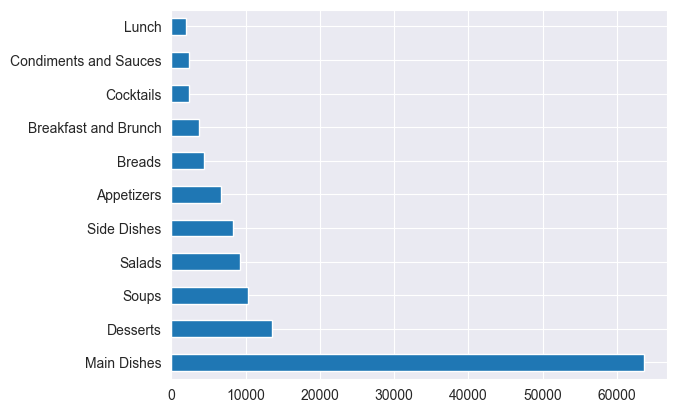

In [8]:
categories = df.category.value_counts()
categories.plot(kind='barh')

In [9]:
df.dropna(subset=['category'],inplace=True)
df.shape

(126849, 9)

In [10]:
from sklearn.model_selection import train_test_split

y = df.category
X = df.Ingredients
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12345,shuffle=True, test_size=0.25, stratify=y)
X_train

28956     ['pizza dough', 'marinara sauce', 'sliced pepp...
132615    ['top round steaks', 'brown mustard', 'onions'...
135867    ['chicken breasts boneless skinless', 'onions'...
38340     ['wide egg noodles', 'cream of mushroom', 'coo...
2397      ['spare ribs', 'vegetable oil', 'brown sugar',...
                                ...                        
97806     ['boneless skinless chicken breasts', 'garlic'...
67795     ['shrimp', 'angel hair pasta', 'butter', 'oliv...
104658    ['chicken stock', 'butter', 'saffron threads',...
3201      ['salmon filets', 'fresh ginger', 'lemongrass'...
117898    ['beef', 'black pepper', 'plain flour', 'salt'...
Name: Ingredients, Length: 95136, dtype: object

In [11]:
import json
def generate_text(data):
    return [doc.replace('\', \'', ' ').replace('[\'', '').replace('\']', '').lower() for doc in data]
train_text = generate_texat(X_train)
test_text = generate_text(X_test)
target = y_train

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(binary=True)
X = tfidf.fit_transform(train_text)
X_test = tfidf.transform(test_text).astype('float16')

lb = LabelEncoder()
y = lb.fit_transform(target)

In [13]:
from sklearn.model_selection import cross_validate

skfold = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)

def cross_validation_statistics(classifier, X, y):
    scores = cross_validate(classifier, X , y, cv=skfold, scoring = {'acc': 'accuracy','prec': 'precision_weighted', 'rec': 'recall_macro'})
    print('Cross validation statistics: ')
    print(' Mean Fit Time:', scores['fit_time'].mean())
    print(' Mean Predict Time:', scores['score_time'].mean())
    print(' Mean Accuracy:', scores['test_acc'].mean())
    print(' Mean Weighted Precision:', scores['test_prec'].mean())
    print(' Mean Macro Recall:', scores['test_rec'].mean())

In [14]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X, y)

y_pred = dt.predict(X_test)
y_pred = lb.inverse_transform(y_pred)

cross_validation_statistics(dt, X, y)

Cross validation statistics: 
 Mean Fit Time: 13.183510541915894
 Mean Predict Time: 0.023613452911376953
 Mean Accuracy: 0.7130108212068089
 Mean Weighted Precision: 0.7092394129050485
 Mean Macro Recall: 0.5907695443754577


In [15]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier()
adaBoost.fit(X, y)

y_pred = adaBoost.predict(X_test)
y_pred = lb.inverse_transform(y_pred)

cross_validation_statistics(adaBoost, X, y)

Cross validation statistics: 
 Mean Fit Time: 14.984416484832764
 Mean Predict Time: 0.1404275417327881
 Mean Accuracy: 0.5378406899485931
 Mean Weighted Precision: 0.4984409700429415
 Mean Macro Recall: 0.32334169256548195


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

y_pred = knn.predict(X_test)
y_pred = lb.inverse_transform(y_pred)

cross_validation_statistics(knn, X, y)

Cross validation statistics: 
 Mean Fit Time: 0.012685012817382813
 Mean Predict Time: 59.43381781578064
 Mean Accuracy: 0.7565800428827565
 Mean Weighted Precision: 0.7650578189619889
 Mean Macro Recall: 0.6651387271181888


In [17]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(X, y)

y_pred = logisticRegression.predict(X_test)
y_pred = lb.inverse_transform(y_pred)

cross_validation_statistics(logisticRegression, X, y)

Cross validation statistics: 
 Mean Fit Time: 2.8651733875274656
 Mean Predict Time: 0.01260361671447754
 Mean Accuracy: 0.8268163408605183
 Mean Weighted Precision: 0.8193961583328152
 Mean Macro Recall: 0.7025522126576702


In [18]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X, y)

y_pred = svc.predict(X_test)
y_pred = lb.inverse_transform(y_pred)

cross_validation_statistics(svc, X, y)

Cross validation statistics: 
 Mean Fit Time: 852.5451084136963
 Mean Predict Time: 102.54272079467773
 Mean Accuracy: 0.8586549651475543
 Mean Weighted Precision: 0.854811638899554
 Mean Macro Recall: 0.7460118169722023


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

y_pred = rf.predict(X_test)
y_pred = lb.inverse_transform(y_pred)

cross_validation_statistics(rf, X, y)

Cross validation statistics: 
 Mean Fit Time: 57.19256272315979
 Mean Predict Time: 0.5835932731628418
 Mean Accuracy: 0.7763622242267079
 Mean Weighted Precision: 0.7993203059247491
 Mean Macro Recall: 0.5663785404488194


In [ ]:
import pickle

with open('../pickles/model_category.pickle', 'wb') as to_write:
    pickle.dump(logisticRegression, to_write)
with open('../pickles/lb_category.pickle', 'wb') as to_write:
    pickle.dump(lb, to_write)
with open('t../pickles/fidf_category.pickle', 'wb') as to_write:
    pickle.dump(tfidf, to_write)